<a href="https://colab.research.google.com/github/coramusungu/100-Days-Of-ML-Code/blob/master/Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. select the libraries
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
# 2. select the data from the source
from google.colab import files
uploaded = files.upload()

Saving Corona_NLP_train.csv to Corona_NLP_train (2).csv


In [3]:
#3. encode the text dataset and print the shape of the data
tweetdata_ = pd.read_csv('Corona_NLP_train.csv', encoding = 'latin1')
print('The shape of the data frame is :\n', tweetdata_.shape)

tweetdata = tweetdata_.sample(2000)
#4. select a sample with a certain number of records
tweetdata.head()

The shape of the data frame is :
 (41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
23201,27000,71952,Leeds,25-03-2020,What #Fwitts would make people stand in a line...,Negative
24953,28752,73704,A Hesse in MUC and CGN & DUS,28-03-2020,Protected shopping with my wife during the #Co...,Extremely Positive
33266,37065,82017,United States,07-04-2020,Pretty happy I still have my Melaleuca account...,Extremely Positive
38870,42669,87621,Hong Kong,12-04-2020,You can also make masks that achieve gt 90 fun...,Negative
905,4704,49656,Florida,17-03-2020,Overheard at the grocery store: ÂI like froze...,Extremely Positive


In [4]:
#i. Check the sum of missing Values
#a. checking for records with missing(null) values in 'description'
tweetdata['OriginalTweet'].isnull().sum()

#b. Drop all records with missing values 
tweetdata = tweetdata.dropna()
print(tweetdata)

       UserName  ...           Sentiment
23201     27000  ...            Negative
24953     28752  ...  Extremely Positive
33266     37065  ...  Extremely Positive
38870     42669  ...            Negative
905        4704  ...  Extremely Positive
...         ...  ...                 ...
13739     17538  ...            Negative
29430     33229  ...            Positive
6887      10686  ...  Extremely Positive
17931     21730  ...  Extremely Negative
4018       7817  ...  Extremely Negative

[1579 rows x 6 columns]


# 1. Topic Modelling

This is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Word Clouds and LDA can be used to identify these.



## 1.1 WordClouds

In [5]:
#removing common words and insultive words eg fuck, https
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "fuck", "fucking", "Comment", "covid", "coronavirus"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

In [6]:
#b. Drop all records with missing values 
df = tweetdata.dropna()

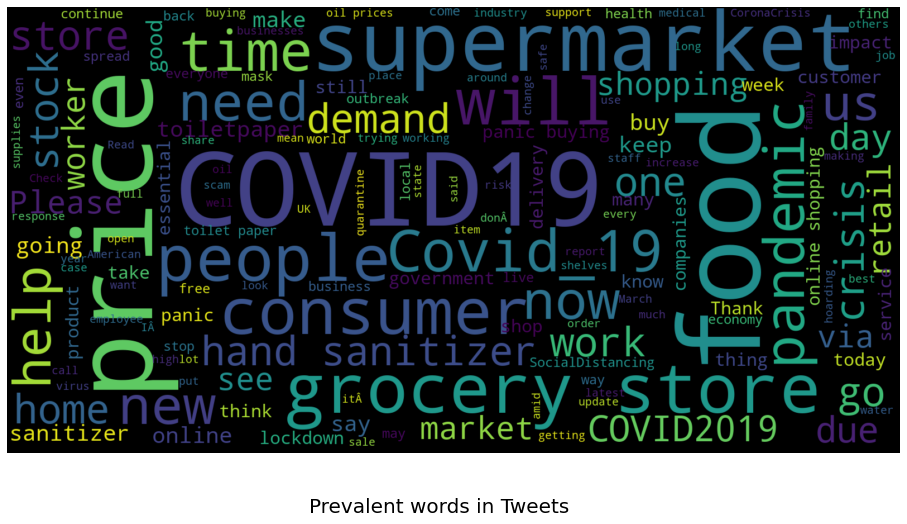

In [7]:
show_wordcloud(df['OriginalTweet'], title = 'Prevalent words in Tweets')

## 1.2 LDA (Latent Dirichlet Allocation)

In [8]:
#Converting text document into a matrix
from sklearn.feature_extraction.text import CountVectorizer 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(tweetdata['OriginalTweet'])

In [9]:
#LDA (Latent Dirichlet Allocation) for grouping the words associated with each topic
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5)  # This model takes a while when the data is huge
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [10]:
#1. Checking the number of Stored Words
len(cv.get_feature_names())

2840

In [11]:
#2. Showing Top 5 Words Per Topic
print(len(LDA.components_[0]))
single_topic = LDA.components_[0]

#3. showing the number of words associated with each topic
single_topic.argsort()[-5:]

2840


array([1033,  558, 1282,  621,   17])

In [12]:
#4. Singling out the topics
top_word_indices = single_topic.argsort()[-5:]
for index in top_word_indices:
    print(cv.get_feature_names()[index])

food
consumer
https
covid
19


In [13]:
#5. Printing out the words associated with each topic
for index,topic in enumerate(LDA.components_):
    print(f'TOPIC {index} TOP 10 WORDS')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

TOPIC 0 TOP 10 WORDS
['prices', 'online', 'store', 'grocery', 'amp', 'food', 'consumer', 'https', 'covid', '19']


TOPIC 1 TOP 10 WORDS
['panic', 'day', 'pandemic', 'food', 'supermarket', 'prices', '19', 'coronavirus', 'covid', 'https']


TOPIC 2 TOP 10 WORDS
['food', 'amp', 'grocery', 'store', '19', 'covid', 'prices', 'covid19', 'coronavirus', 'https']


TOPIC 3 TOP 10 WORDS
['people', 'consumer', 'online', 'food', 'shopping', 'coronavirus', 'https', 'supermarket', 'covid', '19']


TOPIC 4 TOP 10 WORDS
['amp', 'prices', 'supermarket', 'covid19', 'people', 'food', 'grocery', 'store', 'coronavirus', 'https']




In [14]:
#6. Attaching Discovered Topic Labels to Original Articles
tweetdata['Topic'] = LDA.transform(dtm).argmax(axis=1)
tweetdata.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Topic
23201,27000,71952,Leeds,25-03-2020,What #Fwitts would make people stand in a line...,Negative,2
24953,28752,73704,A Hesse in MUC and CGN & DUS,28-03-2020,Protected shopping with my wife during the #Co...,Extremely Positive,2
33266,37065,82017,United States,07-04-2020,Pretty happy I still have my Melaleuca account...,Extremely Positive,4
38870,42669,87621,Hong Kong,12-04-2020,You can also make masks that achieve gt 90 fun...,Negative,4
905,4704,49656,Florida,17-03-2020,Overheard at the grocery store: ÂI like froze...,Extremely Positive,4
12760,16559,61511,ORD,21-03-2020,#GasPrices: Why the gas prices are still high ...,Neutral,2
25200,28999,73951,Her heart,31-03-2020,REAL Breaking News Johnson amp Johnson the con...,Neutral,2
624,4423,49375,Pgh,16-03-2020,I was wondering if my cash register person in ...,Extremely Positive,3
36898,40697,85649,"Sussex, England",10-04-2020,Food redistribution organisations across Engla...,Positive,2
28157,31956,76908,USA,04-04-2020,Futures prices for major commodities including...,Neutral,4


# 2. Sentiment analysis
## 2.1 With SentimentIntensityAnalyzer




In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"      

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [17]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

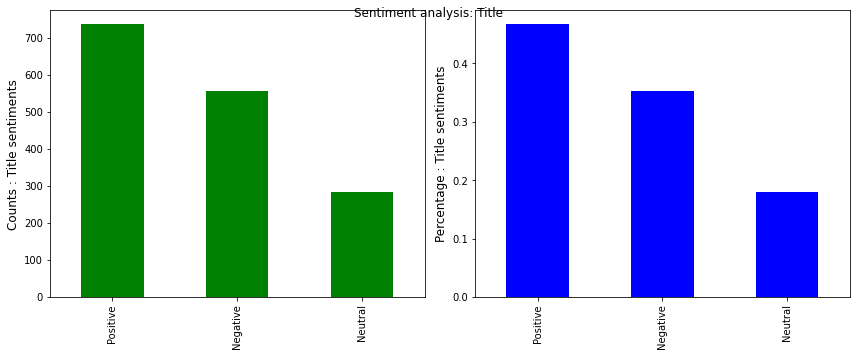

In [18]:
df['title_sentiment'] = df['OriginalTweet'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'title_sentiment', 'Title')

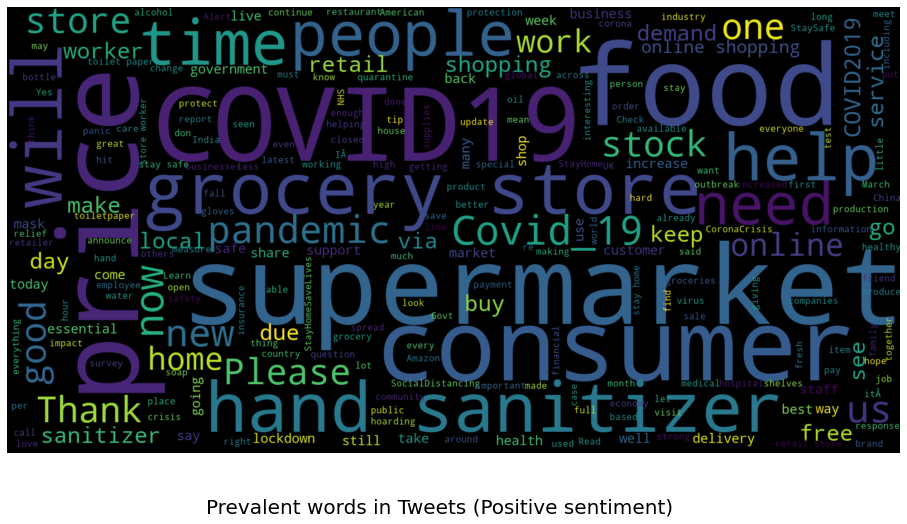

In [19]:
show_wordcloud(df.loc[df['title_sentiment']=='Positive', 'OriginalTweet'], title = 'Prevalent words in Tweets (Positive sentiment)')

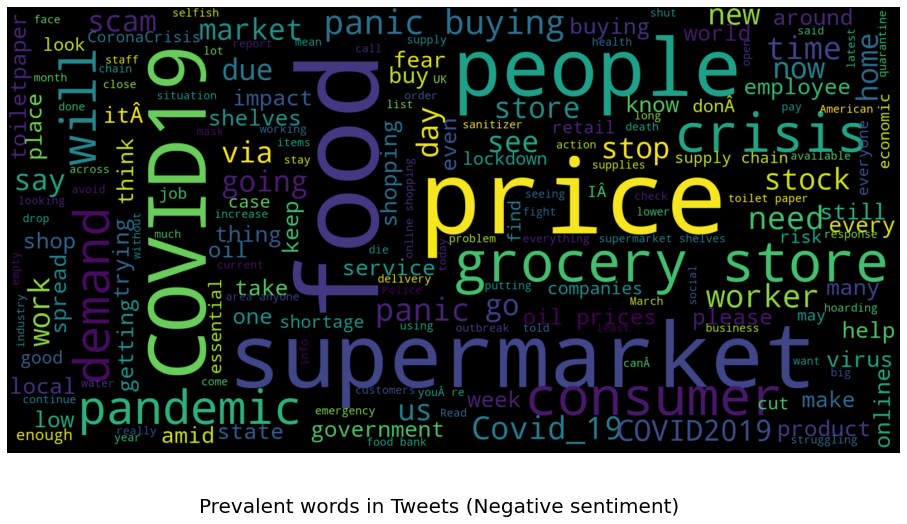

In [20]:
show_wordcloud(df.loc[df['title_sentiment']=='Negative', 'OriginalTweet'], title = 'Prevalent words in Tweets (Negative sentiment)')

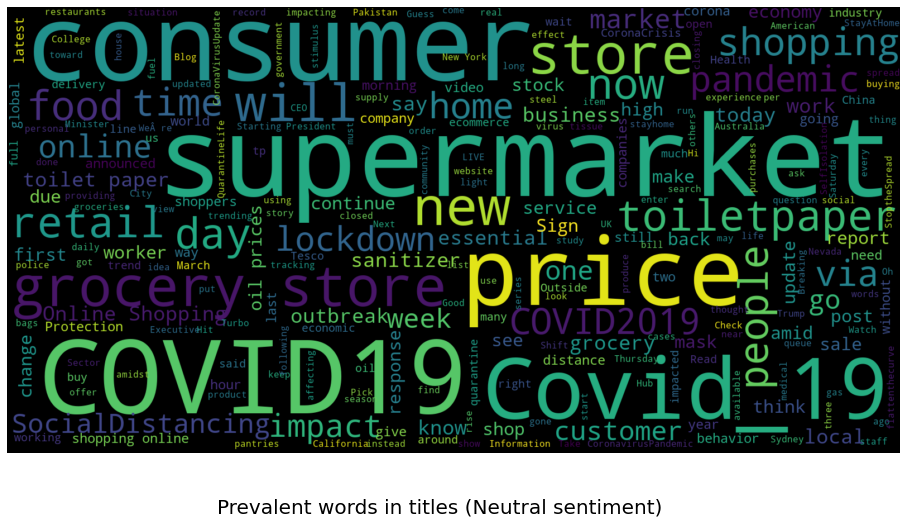

In [21]:
show_wordcloud(df.loc[df['title_sentiment']=='Neutral', 'OriginalTweet'], title = 'Prevalent words in titles (Neutral sentiment)')

## 2.2 With TextBlob

In [22]:
import nltk
nltk.download('punkt')
from textblob import TextBlob
def find_sentiment_polarity_textblob(post):
    blob = TextBlob(post)
    polarity = 0
    for sentence in blob.sentences:
        polarity += sentence.sentiment.polarity
    return polarity

def find_sentiment_subjectivity_textblob(post):
    blob = TextBlob(post)
    subjectivity = 0
    for sentence in blob.sentences:
        subjectivity += sentence.sentiment.subjectivity
    return subjectivity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
df['title_sentiment_polarity'] = df['OriginalTweet'].apply(lambda x: find_sentiment_polarity_textblob(x))
df['title_sentiment_subjectivity'] = df['OriginalTweet'].apply(lambda x: find_sentiment_subjectivity_textblob(x))

In [24]:
def plot_sentiment_textblob(data, feature, title):
    polarity = data[feature+'_sentiment_polarity']
    subjectivity = data[feature+'_sentiment_subjectivity']

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    polarity.plot(kind='kde', ax=ax1, color='magenta')
    subjectivity.plot(kind='kde', ax=ax2, color='green')
    ax1.set_ylabel(f'Sentiment polarity : {title}', size=12)
    ax2.set_ylabel(f'Sentiment subjectivity: {title}', size=12)
    plt.suptitle(f"Sentiment analysis (polarity & subjectivity): {title}")
    plt.tight_layout()
    plt.show()

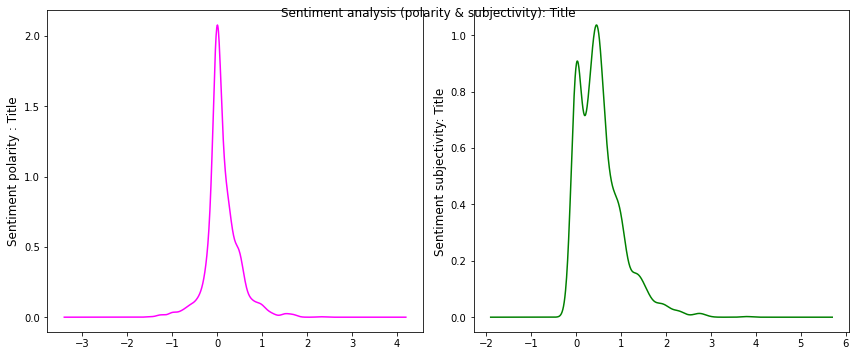

In [25]:
plot_sentiment_textblob(df, "title", 'Title')

#3. Thematic Analysis

In [26]:
import string
import collections

In [27]:
#i. Check the sum of missing Values
#a. checking for records with missing(null) values in 'description'
tweetdata['OriginalTweet'].isnull().sum()

#b. Drop all records with missing values 
clean_tweets = tweetdata.dropna()
print(clean_tweets)

       UserName  ScreenName  ...           Sentiment Topic
23201     27000       71952  ...            Negative     2
24953     28752       73704  ...  Extremely Positive     2
33266     37065       82017  ...  Extremely Positive     4
38870     42669       87621  ...            Negative     4
905        4704       49656  ...  Extremely Positive     4
...         ...         ...  ...                 ...   ...
13739     17538       62490  ...            Negative     2
29430     33229       78181  ...            Positive     2
6887      10686       55638  ...  Extremely Positive     4
17931     21730       66682  ...  Extremely Negative     0
4018       7817       52769  ...  Extremely Negative     3

[1579 rows x 7 columns]


In [28]:
#i. Create an array to store transformed data
transformed_tweets = []

#ii. Convert Cleaned Sample data to lower case
clean_tweets_lowcase = clean_tweets['OriginalTweet'].str.lower() 
print('Tweets Description in lower case: \n', clean_tweets_lowcase)

Tweets Description in lower case: 
 23201    what #fwitts would make people stand in a line...
24953    protected shopping with my wife during the #co...
33266    pretty happy i still have my melaleuca account...
38870    you can also make masks that achieve gt 90 fun...
905      overheard at the grocery store: âi like froze...
                               ...                        
13739    amount of time iâd have to wait in line outsi...
29430    it's interesting how the highly developed logi...
6887     with an increase in online shopping, don't for...
17931    are you getting weird text message or calls re...
4018     while âpanic buyingâ at the local grocery ea...
Name: OriginalTweet, Length: 1579, dtype: object


In [29]:
#iii. Splitting text to separate words
split_tweets = clean_tweets_lowcase.str.split(' ')
print('Separate words of Spam Description', split_tweets)

Separate words of Spam Description 23201    [what, #fwitts, would, make, people, stand, in...
24953    [protected, shopping, with, my, wife, during, ...
33266    [pretty, happy, i, still, have, my, melaleuca,...
38870    [you, can, also, make, masks, that, achieve, g...
905      [overheard, at, the, grocery, store:, âi, lik...
                               ...                        
13739    [amount, of, time, iâd, have, to, wait, in, l...
29430    [it's, interesting, how, the, highly, develope...
6887     [with, an, increase, in, online, shopping,, do...
17931    [are, you, getting, weird, text, message, or, ...
4018     [while, âpanic, buyingâ, at, the, local, gro...
Name: OriginalTweet, Length: 1579, dtype: object


In [30]:
#iv. Remove punctuations
for text in split_tweets:
  text = [x.strip(string.punctuation) for x in text]
  transformed_tweets.append(text)

#v. Output transformed data
print(transformed_tweets)

[['what', 'fwitts', 'would', 'make', 'people', 'stand', 'in', 'a', 'line', 'in', 'a', 'supermarket', '4', 'aisles', 'long', '2', 'meters', 'apart', 'coughing', 'and', 'spluttering', 'in', 'no', 'moving', 'air', '1', 'checkout', 'open', 'for', '90mins', 'morrisons', 'we', 'are', 'following', 'gov', 'regulations', '2', 'meters', 'apart', 'they', 'told', 'me', 'staticair', 'movefaster', 'covid2019'], ['protected', 'shopping', 'with', 'my', 'wife', 'during', 'the', 'coronapandemie', 'thanks', 'to', "manomama's", 'urbandoo_online', 'loop.\r\r\n#staysafe', 'stayhealthy', '', 'socialdistanacing', 'coronavirus', 'covid19', 'socialdistanacing', 'maskeauf', 'https://t.co/cpykboekvt', 'https://t.co/xmnon0rxjr'], ['pretty', 'happy', 'i', 'still', 'have', 'my', 'melaleuca', 'account', 'and', 'was', 'able', 'to', 'order', 'sanitizer', 'through', 'them', 'since', 'it', 'was', 'all', 'snagged', 'up', 'by', 'the', 'hoarders', 'they', 'put', 'a', 'limit', 'of', 'one', 'per', 'customer', 'all', 'retailer

In [31]:
#vi. integrate sample data to create text corpus
text_corpus = [' '.join(text) for text in transformed_tweets]
final_text_corpus = ' '.join(text_corpus)
print(final_text_corpus)

The goal of a thematic analysis is to identify themes, i.e. patterns in the data that are interesting. From the above tweets, we can see that for the period of April and March 2020, around the world, people were tweeting links. The links could be for online shopping or tracking of covid cases. The people were tweeting on corona virus(covid), shopping for food at the grocery shops, supermarkets and online.